Задача

Для разработки стратегии взаимодействия с клиентами провести анализ клиентской базы.

- Сделать прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) другие особенности взаимодействия с клиентами.
    
Индикатор оттока: отсутствие посещений спорт-зала за последний месяц

# Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from IPython.display import display

def load_csv_choose_path(filename):
    """
    Функция читает csv файл, проверяя 2 пути,
    чтобы не требовалось править код перед отправкой ревьюверу.
    Созданна коллективно в da_24_teamwork
    """
    path1 = filename
    path2 = '/datasets/' + filename
    if os.path.exists(path1):
        data = pd.read_csv(path1)
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
    else:
        raise FileNotFoundError(filename)
    print('-=',filename, '=-') 
    print()
    print(data.info())
    print()
    display(data.head())
    display(data.describe())
    return data
    

In [2]:
df = load_csv_choose_path('gym_churn.csv')

-= gym_churn.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Исследовательский анализ данных (EDA)

Датасет содержит 14 столбцов по 4000 записей в каждом, без пропусков и аномалий. Все типы данных числовые (int/float), в том числе есть категориальные (1/0).

В отток ушло 26,5% пользователей. 

## Lifetime

Мне показалось сначала, что данные по "Lifetime" противоречат данным о длительности контракта ("Contract_period"). Среднее время с момента первого обращения в ФЦ не может быть меньше, чем средняя длительность контракта.Поэтому я сделала проверочку.
Получилось, что Lifetime, конечно может быть меньше, чем длительность контракта (если клиент только пришел и заключил контракт) и Lifetime равен нулю по тем контрактам, где длительность контракта совпадает с остатком месяцев, то есть клиент только купил абонемент. 

НО! 137 записей имеют ошибку - Lifetime меньше, чем количество месяцев, которые уже прошли по заключенным контрактам, а так не может быть. 
Далее в этом разделе проверочка:

In [3]:
#Возможно, это данные неполные, посмотрю на них внимательнее:  
df['Lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
19      7
18      7
20      7
21      5
26      2
24      2
22      2
23      2
27      1
29      1
31      1
Name: Lifetime, dtype: int64

Да, много нулей, смотрю дальше

In [4]:
df.query('Lifetime == 0').describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.000000
mean,0.496920,0.796715,0.340862,0.207392,0.887064,2.209446,0.308008,27.570842,121.704747,2.090349,0.0,1.541753,1.205104,0.827515
std,0.500505,0.402857,0.474487,0.405856,0.316840,2.920989,0.462145,3.216248,83.684461,2.651975,0.0,0.801810,0.895059,0.378190
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,56.748492,1.000000,0.0,0.985702,0.478711,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,105.266504,1.000000,0.0,1.561419,1.117607,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,30.000000,173.214908,1.000000,0.0,2.087558,1.793432,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,36.000000,462.178660,12.000000,0.0,4.483104,4.294359,1.000000


In [5]:
df['Contract_period'].value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

In [6]:
df_chekup = df[['Lifetime','Contract_period','Month_to_end_contract']]
df_chekup['gap'] = df_chekup['Lifetime'] - (df_chekup['Contract_period']-df_chekup['Month_to_end_contract'])
df_chekup

<ipython-input-6-2e6f7950f329>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chekup['gap'] = df_chekup['Lifetime'] - (df_chekup['Contract_period']-df_chekup['Month_to_end_contract'])


,Lifetime,Contract_period,Month_to_end_contract,gap
0,3,6,5.0,2.0
1,7,12,12.0,7.0
2,2,1,1.0,2.0
3,2,12,12.0,2.0
4,3,1,1.0,3.0
...,...,...,...,...
3995,8,12,12.0,8.0
3996,1,1,1.0,1.0
3997,2,12,11.0,1.0
3998,3,6,5.0,2.0


In [7]:
df_chekup.query('Lifetime ==0').mean()

Lifetime                 0.000000
Contract_period          2.209446
Month_to_end_contract    2.090349
gap                     -0.119097
dtype: float64

In [8]:
df_chekup.query('gap < 0')

,Lifetime,Contract_period,Month_to_end_contract,gap
71,0,12,11.0,-1.0
72,0,6,5.0,-1.0
94,0,6,5.0,-1.0
95,0,6,5.0,-1.0
107,1,12,9.0,-2.0
...,...,...,...,...
3912,1,12,8.0,-3.0
3919,1,12,6.0,-5.0
3952,3,12,6.0,-3.0
3972,3,12,8.0,-1.0


Всё-таки есть ошибки! 3,4% данных содержат ошибочный Lifetime - он не может быть меньше, чем количество месяцев, прошедших по контракту.

Тут есть три пути:
1. удалить столбец Lifetime - ошибок немного, удалять черезчур жестоко. НО большинство клиентов у нас новые (средний Lifetime - меньше 4 месяцев), поэтому этот признак мне не кажется информативным в целом.
2. удалить те записи, в которых выявлена ошибка - НО жааалко
3. заменить ошибочные данные на расчетные - тоже нормальный вариант в данном случае

Далее я сделаю обучение и расчет метрик на полном датасете и на датасете без Lifetime для сравнения.

## Cредние значения признаков в двух группах 

Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [9]:
df_mean = df.groupby('Churn').mean().T
df_mean['ratio'] = df_mean[1] / df_mean[0]
df_mean

Churn,0,1,ratio
gender,0.510037,0.510839,1.001571
Near_Location,0.873086,0.768143,0.879802
Partner,0.534195,0.355325,0.665160
Promo_friends,0.353522,0.183789,0.519880
Phone,0.903709,0.902922,0.999129
Contract_period,5.747193,1.728558,0.300766
Group_visits,0.464103,0.268615,0.578782
Age,29.976523,26.989632,0.900359
Avg_additional_charges_total,158.445715,115.082899,0.726324
Month_to_end_contract,5.283089,1.662582,0.314699


Предполагаю, что 1 - это те, кто ушли. У части признаков средние значения близки в обеих группах, но есть и заметные различия.
Схожие признаки:
- соотношение полов;
- наличие номера телефона;

Признаки с небольшим отличием (10-12%):
- близость к дому/работе;
- возраст;

Остальные признаки различются более заметно.

## Гистограммы

### Отток

Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

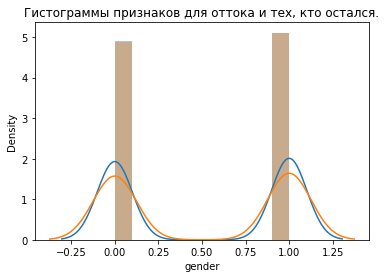

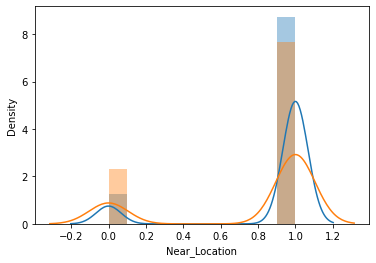

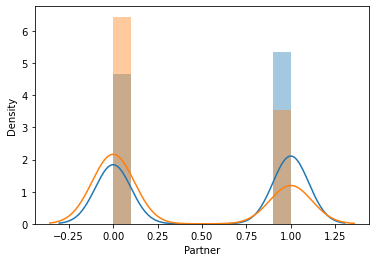

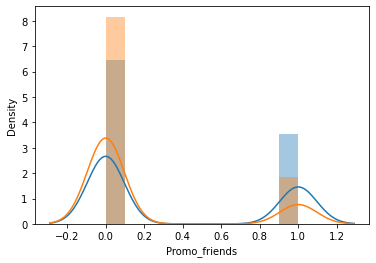

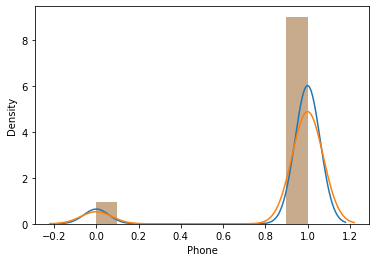

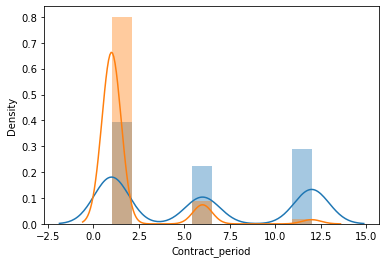

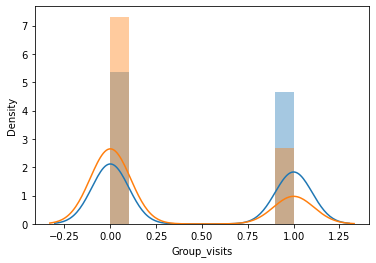

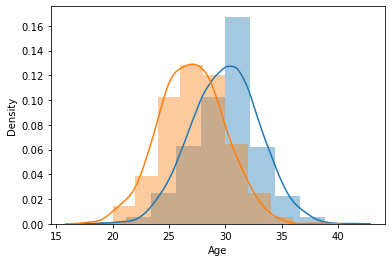

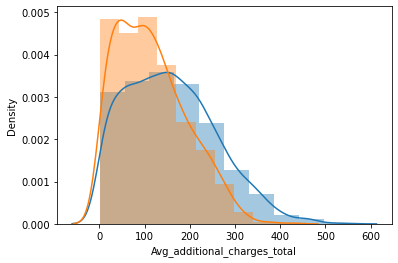

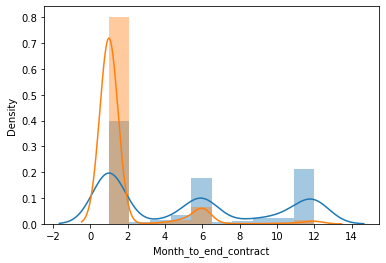

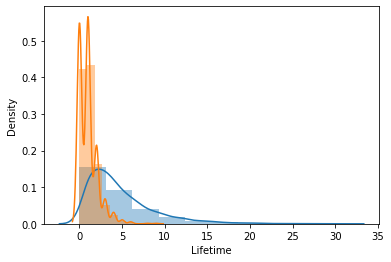

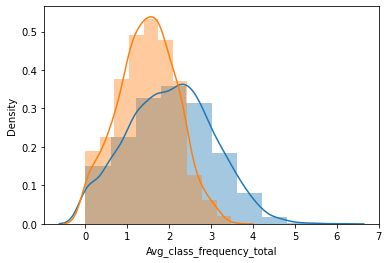

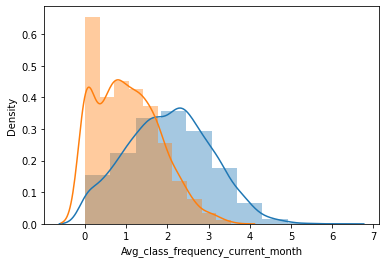

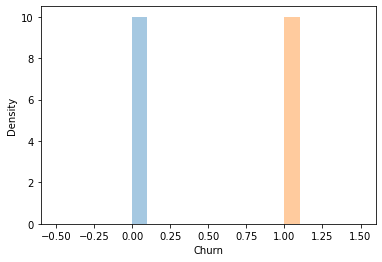

In [10]:
import warnings

warnings.simplefilter('ignore')

plt.title('Гистограммы признаков для оттока и тех, кто остался.')
for feature in df.columns:
    sns.distplot(df.query('Churn == 0')[feature], bins=10)
    sns.distplot(df.query('Churn == 1')[feature], bins=10)
    plt.show() 

В некоторых признаках заметна разница распределений. Например, "Near_Location", "Partner", "Promo_friends", "Contract_Period", "Month_to_end_contract".

## Матрица корреляций

Постройте матрицу корреляций и отобразите её.

In [11]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


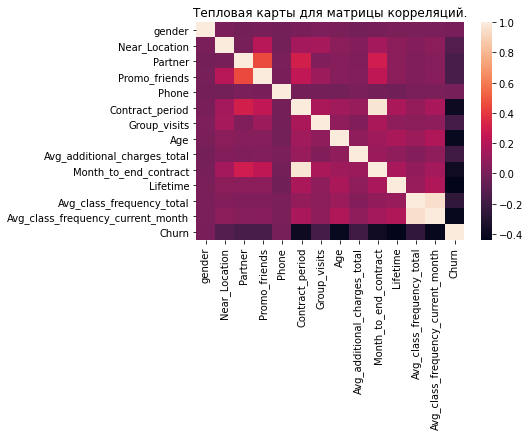

In [12]:
sns.heatmap(df.corr());
plt.title('Тепловая карты для матрицы корреляций.')
plt.show()

В глаза бросаются две пары коррелирующих признаков: Month_to_end_contract&Contract_period; Avg_class_frequency_total&Avg_class_frequency_current_month.
Пока не буду их чистить, так как они не должны повлиять на результат.

# Модель прогнозирования оттока клиентов

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
* Обучите модель на train-выборке двумя способами:
        * логистической регрессией,
        * случайным лесом.

Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

Разделим данные на признаки и целевую переменную.

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

Разделяем модель на обучающую и валидационную выборку

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

## Логистическая регрессия

In [15]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(solver='liblinear', random_state=0)

# обучите модель
model_LR.fit(X_train,y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_LR = model_LR.predict(X_test)
probabilities = model_LR.predict_proba(X_test)[:,1]

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_1 = roc_auc_score(y_test, probabilities) 
roc_auc_1

0.9772012578616351

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,random_state=0)

In [18]:
# обучите модель
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [19]:
# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_RF = model_RF.predict(X_test)

## Метрики accuracy, precision и recall 

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
def metrics_printer(y_test, predictions):
    metrics = ('Accuracy:{:.2f}, Precision:{:.2f}, Recall:{:.2f}, F1:{:.2f}'.format(
            accuracy_score(y_test, predictions),
            precision_score(y_test, predictions),
            recall_score(y_test, predictions),
            f1_score(y_test, predictions) 
            )
    ) 
    return metrics

In [22]:
#метрики для модели, обученной логистической регрессии
LR_Full_dataset = metrics_printer(y_test, predictions_LR)

In [23]:
LR_Full_dataset

'Accuracy:0.93, Precision:0.89, Recall:0.84, F1:0.87'

In [24]:
#метрики для модели, обученной случайным лесом
RF_Full_dataset = metrics_printer(y_test, predictions_RF)
RF_Full_dataset

'Accuracy:0.92, Precision:0.88, Recall:0.83, F1:0.85'

Метрики лучше для модели,обученной алгоритмом логистической регресии.

## удаляем мультиколлинеарность

удаляю столбцы,у которых имеются пары с высокой корреляцией (95-97%), так как наличие таких пар может повредить обучению моделей.

Таких пар у нас две:
Month_to_end_contract и Contract_period; 
Avg_class_frequency_total и Avg_class_frequency_current_month.

Удаляю из них по одному столбцу и заново обучаю модели.

In [25]:
df_1 = df.drop(['Contract_period', 'Avg_class_frequency_total'], axis=1)

In [26]:
X = df_1.drop('Churn', axis=1)
y = df_1['Churn']

Разделяем модель на обучающую и валидационную выборку

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

## Логистическая регрессия - 2

In [28]:
model_LR = LogisticRegression(solver='liblinear', random_state=0)

# обучите модель
model_LR.fit(X_train,y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_LR = model_LR.predict(X_test)
probabilities = model_LR.predict_proba(X_test)[:,1]

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_2 = roc_auc_score(y_test, probabilities) 
roc_auc_2

0.9653285842638942

## Random Forest - 2

In [30]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучите модель
model_RF.fit(X_train,y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_RF = model_RF.predict(X_test)

## Метрики accuracy, precision и recall - 2

Рассчитаем метрики для модели, обученной логистической регрессии

In [31]:
LR_no_multi = metrics_printer(y_test, predictions_LR)
LR_no_multi

'Accuracy:0.92, Precision:0.85, Recall:0.83, F1:0.84'

Рассчитаем метрики для модели, обученной алгоритмом Случайный Лес

In [32]:
RF_no_multi=metrics_printer(y_test, predictions_RF)
LR_no_multi

'Accuracy:0.92, Precision:0.85, Recall:0.83, F1:0.84'

## а что с Lifetime?
Все модели я считала до того, как заметила, что признак Lifetime содержит ошибки и, что даже более важно, наша база клиентов слишком "свежая" и Lifetime не достаточно информативен даже там, где он  корректен. Посмотрим, как будет обучаться модель, если удалить этот признак полностью:

In [33]:
df_no_lifetime = df.drop('Lifetime', axis=1)
df_no_lifetime.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,1.113884,1.120078,0


In [34]:
X = df_no_lifetime.drop('Churn', axis=1)
y = df_no_lifetime['Churn']

Разделяем модель на обучающую и валидационную выборку

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Логистическая регрессия - 3

In [36]:
model_LR = LogisticRegression(solver='liblinear', random_state=0)

# обучите модель
model_LR.fit(X_train,y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_LR = model_LR.predict(X_test)
probabilities = model_LR.predict_proba(X_test)[:,1]

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_3 = roc_auc_score(y_test, probabilities) 
roc_auc_3

0.9264656532098393

## Random Forest - 3

In [38]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучите модель
model_RF.fit(X_train,y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_RF = model_RF.predict(X_test)

## Метрики accuracy, precision и recall - 3

Рассчитаем метрики для модели, обученной логистической регрессии

In [39]:
LR_drop_lifetime = metrics_printer(y_test, predictions_LR)
LR_drop_lifetime

'Accuracy:0.90, Precision:0.86, Recall:0.71, F1:0.78'

Рассчитаем метрики для модели, обученной алгоритмом Случайный Лес

In [40]:
RF_drop_lifetime = metrics_printer(y_test, predictions_RF)
RF_drop_lifetime

'Accuracy:0.88, Precision:0.79, Recall:0.73, F1:0.76'

##  Выводы

In [41]:
print('LR_Full_dataset:', LR_Full_dataset)
print('RF_Full_dataset:',RF_Full_dataset)
print('roc_auc_full_dataset: {:.2f}'.format(roc_auc_1))
print()
print('LR_no_multi:', LR_no_multi)
print('RF_no_multi:',RF_no_multi)
print('roc_auc_no_multi: {:.2f}'.format(roc_auc_2))
print()
print('LR_drop_lifetime:', LR_drop_lifetime)
print('RF_drop_lifetime:',RF_drop_lifetime)
print('roc_auc_drop_lifetime: {:.2f}'.format(roc_auc_3))

LR_Full_dataset: Accuracy:0.93, Precision:0.89, Recall:0.84, F1:0.87
RF_Full_dataset: Accuracy:0.92, Precision:0.88, Recall:0.83, F1:0.85
roc_auc_full_dataset: 0.98

LR_no_multi: Accuracy:0.92, Precision:0.85, Recall:0.83, F1:0.84
RF_no_multi: Accuracy:0.91, Precision:0.85, Recall:0.80, F1:0.82
roc_auc_no_multi: 0.97

LR_drop_lifetime: Accuracy:0.90, Precision:0.86, Recall:0.71, F1:0.78
RF_drop_lifetime: Accuracy:0.88, Precision:0.79, Recall:0.73, F1:0.76
roc_auc_drop_lifetime: 0.93


Наилучшие метрики были получены на максимально полном датасете.

После удаления мультиколлинеарности метрики стали хуже. 

После удаления столбца Lifetime с некорректными данными метрики также ухудшились. По-видимому, этот столбец не так уж плох :)

Предположение, почему после удаления мультиколлинеарности метрики ухудшились. Если задуматься о сути даных, то не должно быть такой высокой корреляции между нашими двумя парами столбцов (длительнось абонемента и срок до окончания абонемента, средняя частота посещений в целом и средняя частота посещений в текущем месяце). Срок до окончания абонемента должен быть точно в среднем меньше, чем длительность абонемента, а в наших данных они почти совпадают. 

Причина может быть в том, что в базе данных слишком много коротких контрактов (и действительно -  в базе 2200 шт контрактов длительностью 1 месяц) или у нас данные из фитнес-центра, который только начал работать и все действующие контракты новые и были заключены примерно в одно время (и действиельно - средний Lifetime меньше 4 мес). Поэтому у них остаток месяцев по контрактам почти совпадает с длительностью контрактов.

# Кластеризация клиентов

## Стандартизация данных
Стандартизирую данные методом StandartScaler

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # обучите scaler на обучающей выборке методом fit
X_train_st = scaler.transform(X_train) # стандартизируйте обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test) # стандартизируйте тестовую выборку методом transform scaler
X_st = scaler.transform(X) # стандартизирую всю выборку методом transform scaler

## Матрица расстояний и дендрограмма

Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. На основании полученного графика предположите, какое количество кластеров можно выделить.

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_st, method = 'ward')

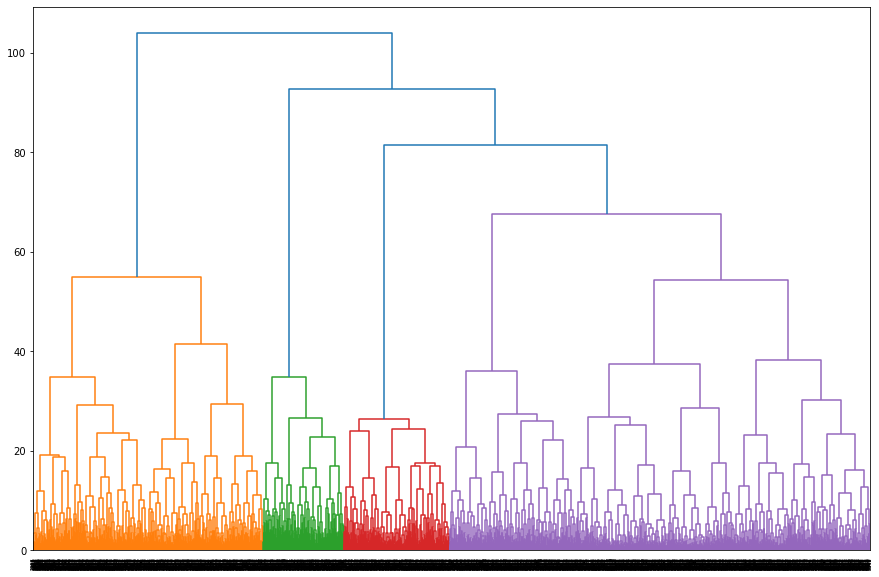

In [44]:
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top')
plt.show()

по количеству цветов определяем, что рекомендуемое количество кластеров - 4

##  Кластеры
Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. За число кластеров принять n=5 (вне зависимости от результатов предыдущего пункта).

In [45]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, random_state=0) #задаем число кластеров, равное 5
labels = km.fit_predict(X_st)

In [46]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [47]:
# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
df_clusters = df.groupby('cluster').mean()

In [48]:
df_clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.496094,0.000000,0.462891,0.080078,1.0,2.439453,0.216797,28.500000,135.967806,2.283203,2.910156,1.668079,1.486657,0.437500
1,0.485782,1.000000,0.346761,0.230648,1.0,1.957346,0.338863,28.248025,131.916855,1.855450,2.948657,1.236770,1.008515,0.488152
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.560096,0.979567,0.361779,0.242788,1.0,2.670673,0.478365,30.069712,159.919562,2.456731,4.223558,2.878366,2.871591,0.098558
4,0.501992,0.963147,0.784861,0.578685,1.0,10.888446,0.543825,29.936255,161.788070,9.965139,4.622510,1.977835,1.967773,0.033865


Смотрим на средние значения признаков для кластеров.


In [49]:
df.groupby('cluster')['Churn'].mean()

cluster
0    0.437500
1    0.488152
2    0.266839
3    0.098558
4    0.033865
Name: Churn, dtype: float64

Смотрим распределения признаков для кластеров. 

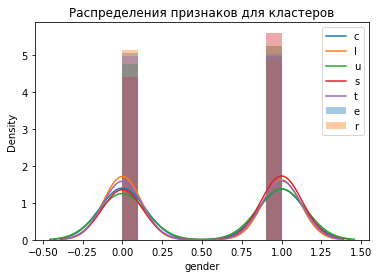

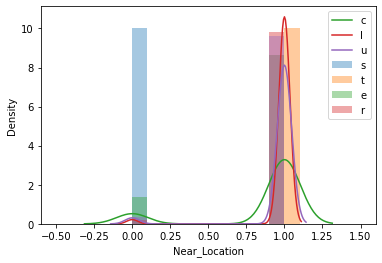

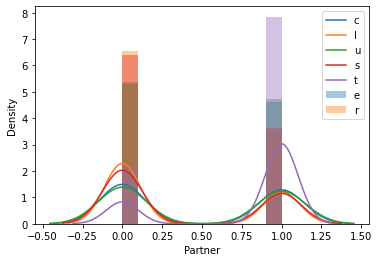

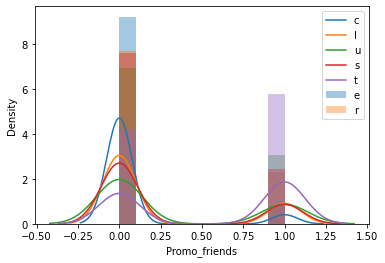

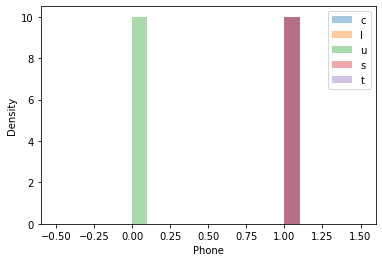

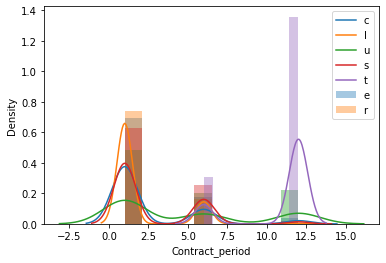

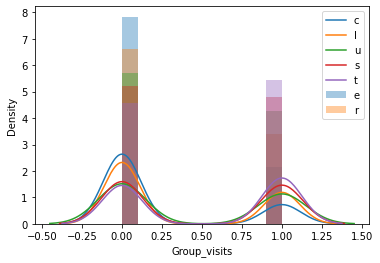

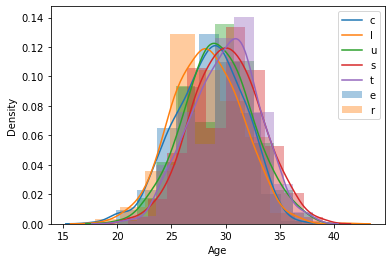

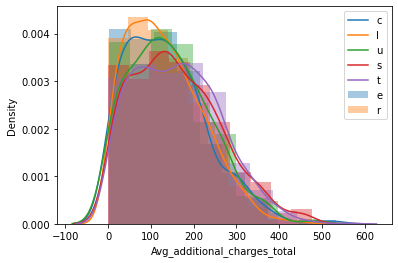

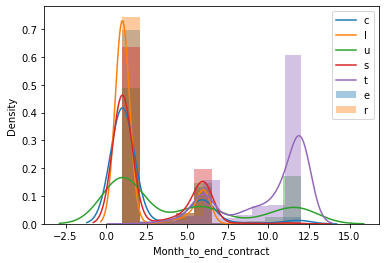

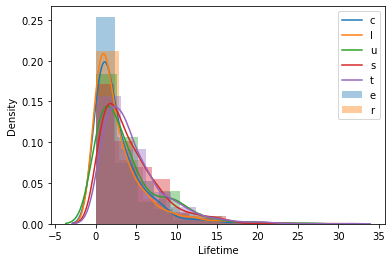

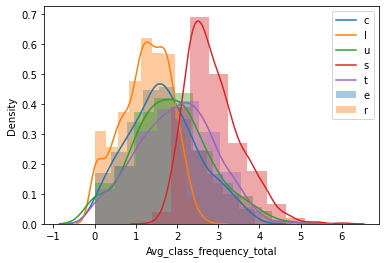

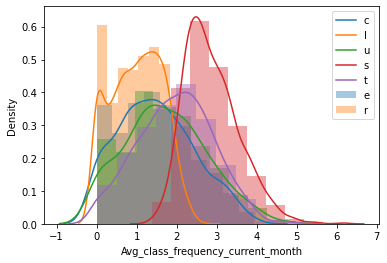

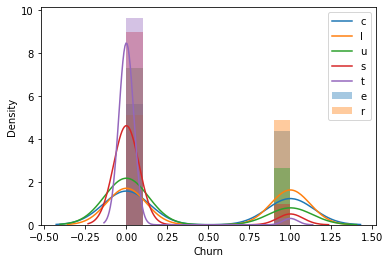

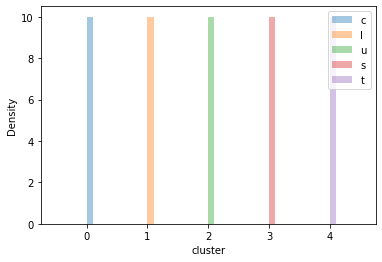

In [50]:
plt.title('Распределения признаков для кластеров')
for feature in df.columns:
    sns.distplot(df.query('cluster == 0')[feature], bins=10)
    sns.distplot(df.query('cluster == 1')[feature], bins=10)
    sns.distplot(df.query('cluster == 2')[feature], bins=10)
    sns.distplot(df.query('cluster == 3')[feature], bins=10)
    sns.distplot(df.query('cluster == 4')[feature], bins=10)
    plt.legend('cluster')
    plt.show() 
    


warnings.simplefilter('ignore')    

## Отток по кластерам
Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [51]:
df.groupby('cluster')['Churn'].mean()

cluster
0    0.437500
1    0.488152
2    0.266839
3    0.098558
4    0.033865
Name: Churn, dtype: float64

Кластеры отличаются по доле оттока - в первом и третьем кластерах (индексы 0 и 3 соотв) доля оттока минимальная (2 % и 9% соответственно). Во втором и пятом кластерах (инд 1,4) отток 24-26%, во третьем - примерно половина (57%).

# Выводы и базовые рекомендации

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

## Выводы

Я рассмотрела датасет из 4000 записей с 14 признаками с целью научиться прогнозировать отток клиентов. В данном датасете 26,5% клиентов ушло в отток. 

В данных выявлено 137 записей с ошибкой в признаке Lifetime. Удаление этого признака не привело к повышению качества прогноза. 
Других ошибок или аномалий не замечено.

**Средние значения признаков для оттока и лояльных (НЕотток) клиентов**

У части признаков средние значения близки в обеих группах, но есть и заметные различия. Схожие признаки:

* соотношение полов;
* наличие номера телефона;


Признаки с небольшим отличием (10-12%):

* близость к дому/работе;
* возраст;
Остальные признаки различются более заметно.

В некоторых признаках заметна разница распределений у оттока и НЕоттока. Например, "Near_Location", "Partner", "Promo_friends", "Contract_Period", "Month_to_end_contract".

Имеются две пары сильно коррелирующих признаков (95-95%) : Month_to_end_contract&Contract_period; Avg_class_frequency_total&Avg_class_frequency_current_month. 

**Обучение**

Далее для прогнозирования я разделила весь датасет на тренировочную и валидационную выборки и обучила тренировочную выборку по алгоритмам "логистическая регрессия" и "случайный лес". Обученная модель затем была применена к валидацинной выборке и я посчитала метрики для оценки качества модели.

Выбор алгоритмов был сделан заказчиком, этот выбор корректен, предложенные алгоритмы хорошо подходят для решения задачи бинарной классификации.

Я сделала три набора датасетов: первый оригинальный датасет без корректировок, второй - после удаления мультиколлинеарности, третий - после удаления признака Lifetime (с сохранением мальтиколлинеарности). Каждый из трех наборов был обучен по двум алгоритмам, в итоге я получила всего шесть моделей и для каждой посчитала метрики. Наилучшие метрики получились при обучении полного датасета, без удаления Lifetime и мультиколлинеарности, алгоритмом "логистическая регрессия". 

LR_Full_dataset: Accuracy:0.93, Precision:0.89, Recall:0.84, F1:0.87
roc_auc_full_dataset: 0.98

Алгоритм логистической регрессии позволяет спрогнозировать не только класс (0 или 1), но и вероятность принадлежности к этому классу.

**Кластеризация**

Далее я применяю другой подход - кластеризацию (группировка клиентов по схожим признакам). Сначала данные стандартизирую и определяю рекомендованное количество кластеров - получается 4. Тем не менее, согласно условиям задачи, далее я разделяю выборку на 5 кластеров алгоритмом K-Means. Получившиеся кластеры позволяют увидеть закономерности, характерные для оттока.

## Рекомендации

Целесообразно привлекать клиентов, проживающих или работающих рядом с фитнес-центром. 

В кластере с минимальным оттоком больше клиентов являются сотрудниками компаний-партнёра клуба и/или пришли по акции "приведи друга". Целесообразно продолжать эти программы.

В кластерах с минимальным оттоком более высокая средняя длительность текущего контракта.
Рекомендация: стимулировать заключение долгосрочных контрактов.

Снижение частоты посещения занятий в текущем месяце является тревожным звоночком.
Отток больше у клиентов, у которых до конца контракта осталось меньше 2-х месяцев.
Рекомендация: стимулировать активность клиента (доп.занятия, групповые занятия и тп) ближе к концу контракта.